In [ ]:
# import libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets
import pandas as pd
import io

#importing libraries
from sklearn.datasets import load_boston #??
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

# generating training dataset


In [ ]:
# upload file with dictionary format, with key as name of uploaded file 
# and corresponding values as the contens of the file 
from google.colab import files
uploaded_train = files.upload()
uploaded_test = files.upload()

#x_data = torch.Tensor(X)
#y_data = torch.Tensor(y.reshape(n_pts, 1))
#print(X.shape)
#print(y_data)

#@title 기본 제목 텍스트
# use panda and io pachage to load txt. 
#dataframe=df
#io패키지 불러와야함
df_train = pd.read_csv(io.StringIO(uploaded_train['Train_Data.txt'].decode("utf-8")), 
                       sep=',', names=['ID', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'class'], header=None)

#EDA(find correlation between features)




In [ ]:
#using 1-filter method for feature selection

#Loading the dataset
x = load_boston()
df = pd.DataFrame(x.data, columns = x.feature_names)
df["MEDV"] = x.target
X = df.drop("MEDV",1)   #Feature Matrix
y = df["MEDV"]          #Target Variable
df.head()

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [ ]:


#print(df_train)
#replace missing value ? with 0
x_train = torch.Tensor(df_train[['x1', 'x2', 'x3', 'x4', 'x5', 'x6']].replace({'?':0}).values.astype(np.uint8))
# class 2 for benign, 4 for malignant -> 0 for bengn, 1 for malignant
y_train = torch.Tensor(df_train['class'].replace({2:0, 4:1}).values.astype(np.uint8))
#print(y_train)

NameError: ignored

# define scatter plot function

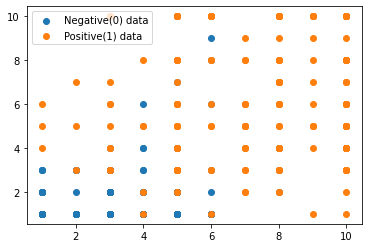

In [ ]:
def scatterplot(X, y):
  plt.scatter(X[y==0, 0], X[y==0, 1], label='Negative(0) data')
  plt.scatter(X[y==1, 0], X[y==1, 1], label='Positive(1) data')  
  plt.legend(loc='best')

#간략하게 표현 위해 2개의 feature만 이용해서 그래프 그림

#scatterplot(x_train.numpy(), y_train.numpy())
scatterplot(x_train.numpy(), y_train.numpy().reshape(len(y_train),)) #[500, 1] -> [500, ]

# Define model class
z = w1*x1 + w2*x2 + w3*x3 ....  + w6*x6 + b  -> <br>
y = a = sigma(z) -> <br>
L(y_hat = a, y)


In [ ]:
class LogisticRegression(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x): 
    pred = torch.sigmoid(self.linear(x))
    return pred   #probability (not direct value)

  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0


# instantiate model class
torch.manual_seed(1)
model = LogisticRegression(x_train.shape[1], 1) # [500, 6],1은 축결정
print(list(model.parameters()))


[Parameter containing:
tensor([[ 0.2104, -0.1802, -0.0791,  0.1916, -0.3843,  0.2448]],
       requires_grad=True), Parameter containing:
tensor([-0.0840], requires_grad=True)]


# function to get model parameters (w1, w2, b)

In [ ]:
[w, b] = model.parameters()
#print(w) 
w1, w2, w3, w4, w5, w6 = w.view(x_train.shape[1])

def get_params():
  return (w1.item(), w2.item(), b[0].item()) #시각화 위함

# show the initial fit plot

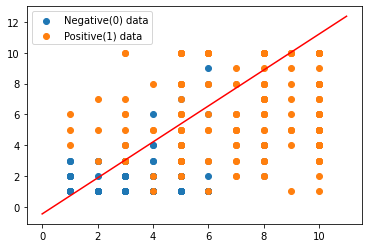

In [ ]:
def fitplot():
  w1, w2, b = get_params()
  x1 = np.array([0, 11])
  # 0 = w1x1 + w2x2 + b
  x2 = (w1*x1 + b)/(-w2)
  plt.plot(x1, x2, 'r')
  scatterplot(x_train.numpy(), y_train.numpy().reshape(len(y_train),))
  plt.show()

fitplot()


# training the model 

In [ ]:
# instantitate optimizer 
criterion = nn.BCELoss()  # = nn.CrossEntropyLoss() # for LR with more than 2 classes
optimizer = torch.optim.SGD(model.parameters(), lr=0.02)

# training the model 
epochs = 100
losses = []

for i in range(epochs):
  y_pred = model.forward(x_train)

  # calculrate loss 
  loss = criterion(y_pred, y_train)
  print("epoch: ", i, "loss: ", loss.item())
  losses.append(loss.item())

  optimizer.zero_grad() # clear gradients wrt parameters
  loss.backward()
  optimizer.step()

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([500])) that is different to the input size (torch.Size([500, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


epoch:  0 loss:  0.68499356508255
epoch:  1 loss:  0.6578665971755981
epoch:  2 loss:  0.6447765827178955
epoch:  3 loss:  0.6367002725601196
epoch:  4 loss:  0.6305561661720276
epoch:  5 loss:  0.6252342462539673
epoch:  6 loss:  0.6203104853630066
epoch:  7 loss:  0.6156160235404968
epoch:  8 loss:  0.6110807061195374
epoch:  9 loss:  0.6066737174987793
epoch:  10 loss:  0.6023801565170288
epoch:  11 loss:  0.5981923937797546
epoch:  12 loss:  0.5941051840782166
epoch:  13 loss:  0.5901151895523071
epoch:  14 loss:  0.5862191319465637
epoch:  15 loss:  0.5824137926101685
epoch:  16 loss:  0.5786972045898438
epoch:  17 loss:  0.575066089630127
epoch:  18 loss:  0.5715183615684509
epoch:  19 loss:  0.5680515766143799
epoch:  20 loss:  0.5646634101867676
epoch:  21 loss:  0.561351478099823
epoch:  22 loss:  0.5581135153770447
epoch:  23 loss:  0.554947555065155
epoch:  24 loss:  0.5518518090248108
epoch:  25 loss:  0.548823893070221
epoch:  26 loss:  0.5458616614341736
epoch:  27 loss: 

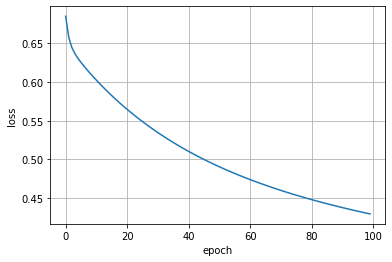

In [ ]:
# log loss
plt.plot(range(epochs), losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()


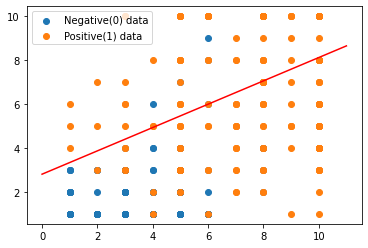

In [ ]:
fitplot()

# model evalation with new datasets the model has never seen before

In [ ]:
# use panda and io pachage to load txt. 
df_test = pd.read_csv(io.StringIO(uploaded_test['Test_Data.txt'].decode("utf-8")), 
                       sep=',', names=['ID', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'class'], header=None)
#print(df_test)
#replace missing value ? with 0
x_test = torch.Tensor(df_test[['x1', 'x2', 'x3', 'x4', 'x5', 'x6']].replace({'?':0}).values.astype(np.uint8))
# class 2 for benign, 4 for malignant -> 0 for bengn, 1 for malignant
y_test = torch.Tensor(df_test['class'].replace({2:0, 4:1}).values.astype(np.uint8))
#print(y_test)

          ID  x1  x2  x3  x4  x5 x6  x7  x8  x9  class
0    1224565   6   1   1   1   2  1   3   1   1      2
1    1238186   4   1   1   1   2  1   2   1   1      2
2    1253917   4   1   1   2   2  1   2   1   1      2
3    1265899   4   1   1   1   2  1   3   1   1      2
4    1268766   1   1   1   1   2  1   1   1   1      2
..       ...  ..  ..  ..  ..  .. ..  ..  ..  ..    ...
194   776715   3   1   1   1   3  2   1   1   1      2
195   841769   2   1   1   1   2  1   1   1   1      2
196   888820   5  10  10   3   7  3   8  10   2      4
197   897471   4   8   6   4   3  4  10   6   1      4
198   897471   4   8   8   5   4  5  10   4   1      4

[199 rows x 11 columns]


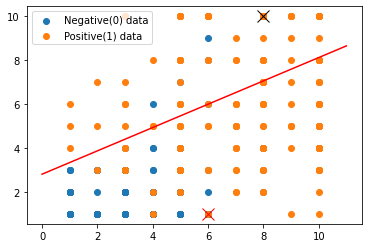

red x (+, 1) prob= 0.2711920142173767
red x's class = 0
blk x (+, 1) prob= 0.8905143737792969
blk x's class = 1


In [ ]:
pnt1_idx = 0
pnt2_idx = 6

plt.plot(x_test.numpy()[pnt1_idx, 0], x_test.numpy()[pnt1_idx, 1], 'rx', markersize=12)
plt.plot(x_test.numpy()[pnt2_idx, 0], x_test.numpy()[pnt2_idx, 1], 'kx', markersize=12)
fitplot()
print("red x (+, 1) prob= {}".format(model.forward(x_test[pnt1_idx]).item()))
print("red x's class = {}".format(model.predict(x_test[pnt1_idx])))
print("blk x (+, 1) prob= {}".format(model.forward(x_test[pnt2_idx]).item()))
print("blk x's class = {}".format(model.predict(x_test[pnt2_idx])))


In [ ]:
#model test w/ all test datasets
no_correct = 0

for i in range(len(x_test)):
  if model.predict(x_test[i]) == y_test[i]:
    no_correct += 1

accuracy = no_correct/len(x_test)*100
print("Predcition accuracy = {}%".format(accuracy))

Predcition accuracy = 95.97989949748744%


In [ ]:
'''
# # a list with each elelment as contens in each line of the dataset
data_train = uploaded_train['Train_Data.txt'].decode("utf-8").split("\r\n")
for i in range(len(data_train)):
   data_train[i] = data_train[i].split(",")
#train data data_train[0][1:3] 이렇게 접근 가능

data_test = uploaded_test['Test_Data.txt'].decode("utf-8").split("\r\n")
for i in range(len(data_test)):
   data_test[i] = data_test[i].split(",")

# #print(data_train)
# #print(data_train[0][1:3])
'''